Adam Whelpley

Prof. Elam

CS379: Machine Learning

11/10/2024


<h1>Machine Learning Using Gini Impurity</h1>
<br/>

In the following code, a Gini impurity model will be used to predict the survival of patients of sepsis. This model was chosen to evaluate the data because a decision tree can be made from it, in which a classification can be evaluated. Using the patient data, we can predict whether the patient survives or doesn't survive. In the raw data, this classification is designated with a 1 being the patient survived and a 0 being the patient did not survive. The Gini Impurity was chosen particularly for this dataset because it is able to quantify the likelihood of mislabeling a randomly selected element. This can be used with the false positives and false negatives of the sample to fine tune the model to predict actual data.


First, we will import necessary libraries. Pandas will help format the data, numpy will assist with some of the calcuations needed for this model, matplotlib will help visualize the data, SMOTE will help balanace it, and sklearn contains functions to assist in developing the model.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

Now, we can read in our dataset and look at the data distributions.

array([[<Axes: title={'center': 'age_years'}>,
        <Axes: title={'center': 'sex_0male_1female'}>],
       [<Axes: title={'center': 'episode_number'}>,
        <Axes: title={'center': 'hospital_outcome_1alive_0dead'}>]],
      dtype=object)

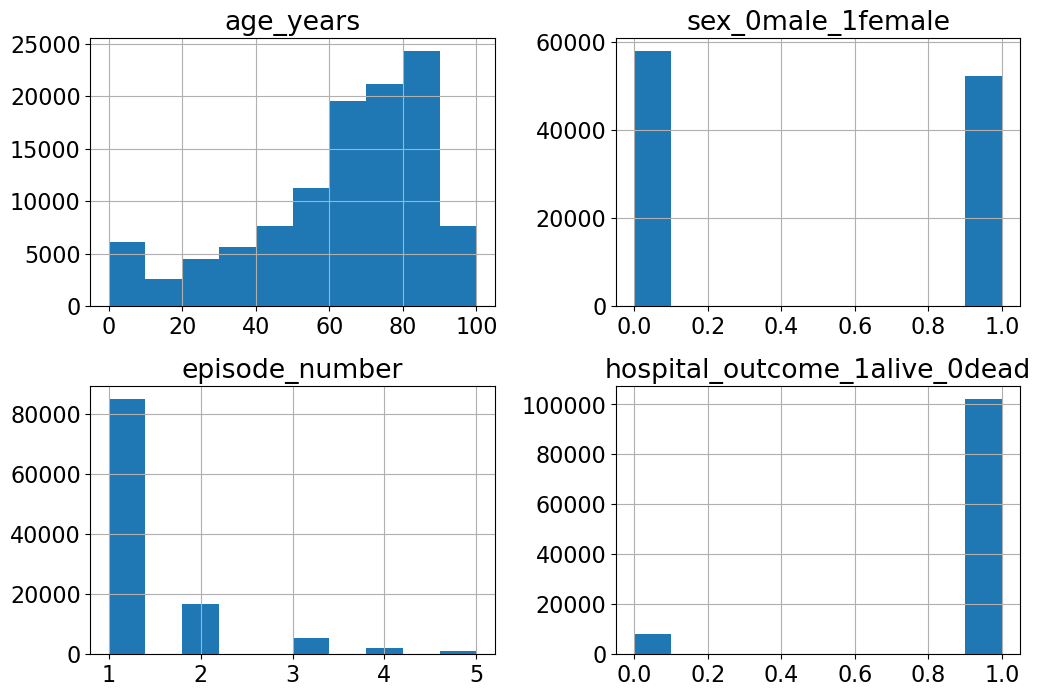

In [13]:
df = pd.read_csv('s41598-020-73558-3_sepsis_survival_dataset/s41598-020-73558-3_sepsis_survival_primary_cohort.csv')
# plot the data distributions and display
plt.rcParams.update({'font.size': 16})
df.hist(figsize=(12,8))

This data shows a large number of people surviving sepsis. In order for the model to accurately predict, the data has to be balanced. Otherwise, the model will overestimate those who survive. SMOTE can be used to correct the data balance.

Text(0.5, 1.0, 'hospital_outcome_1alive_0dead \n (Balanced)')

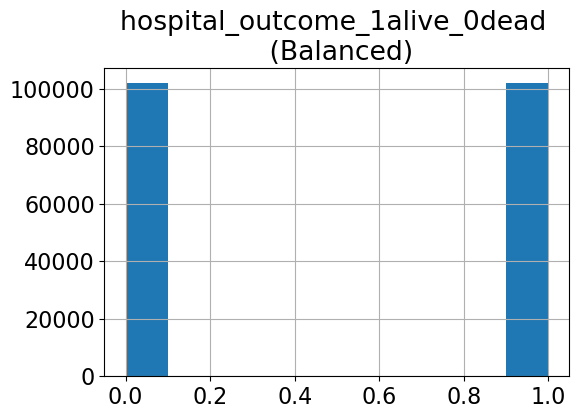

In [14]:
# define predictor and target variable names
X_var_names = df.columns[:3]
y_var_names = df.columns[3]

# create predictor and target arrays
X = df[X_var_names]
y = df[y_var_names]

# oversample minority class using smote
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
y_resampled.hist(figsize=(6,4))
plt.title('hospital_outcome_1alive_0dead \n (Balanced)')

Now that we have a more balanced dataset, we can create our training and testing datasets. The training set will be used to grow our decision tree. The testing set will be used to validate our results

In [15]:
# testing dataset will be 20% of the original and the remaining 80% will be used for training
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [16]:
# training
clf = tree.DecisionTreeClassifier(random_state = 0)
clf = clf.fit(X_train, y_train)

The decision tree is large, and can be visualized with the following.

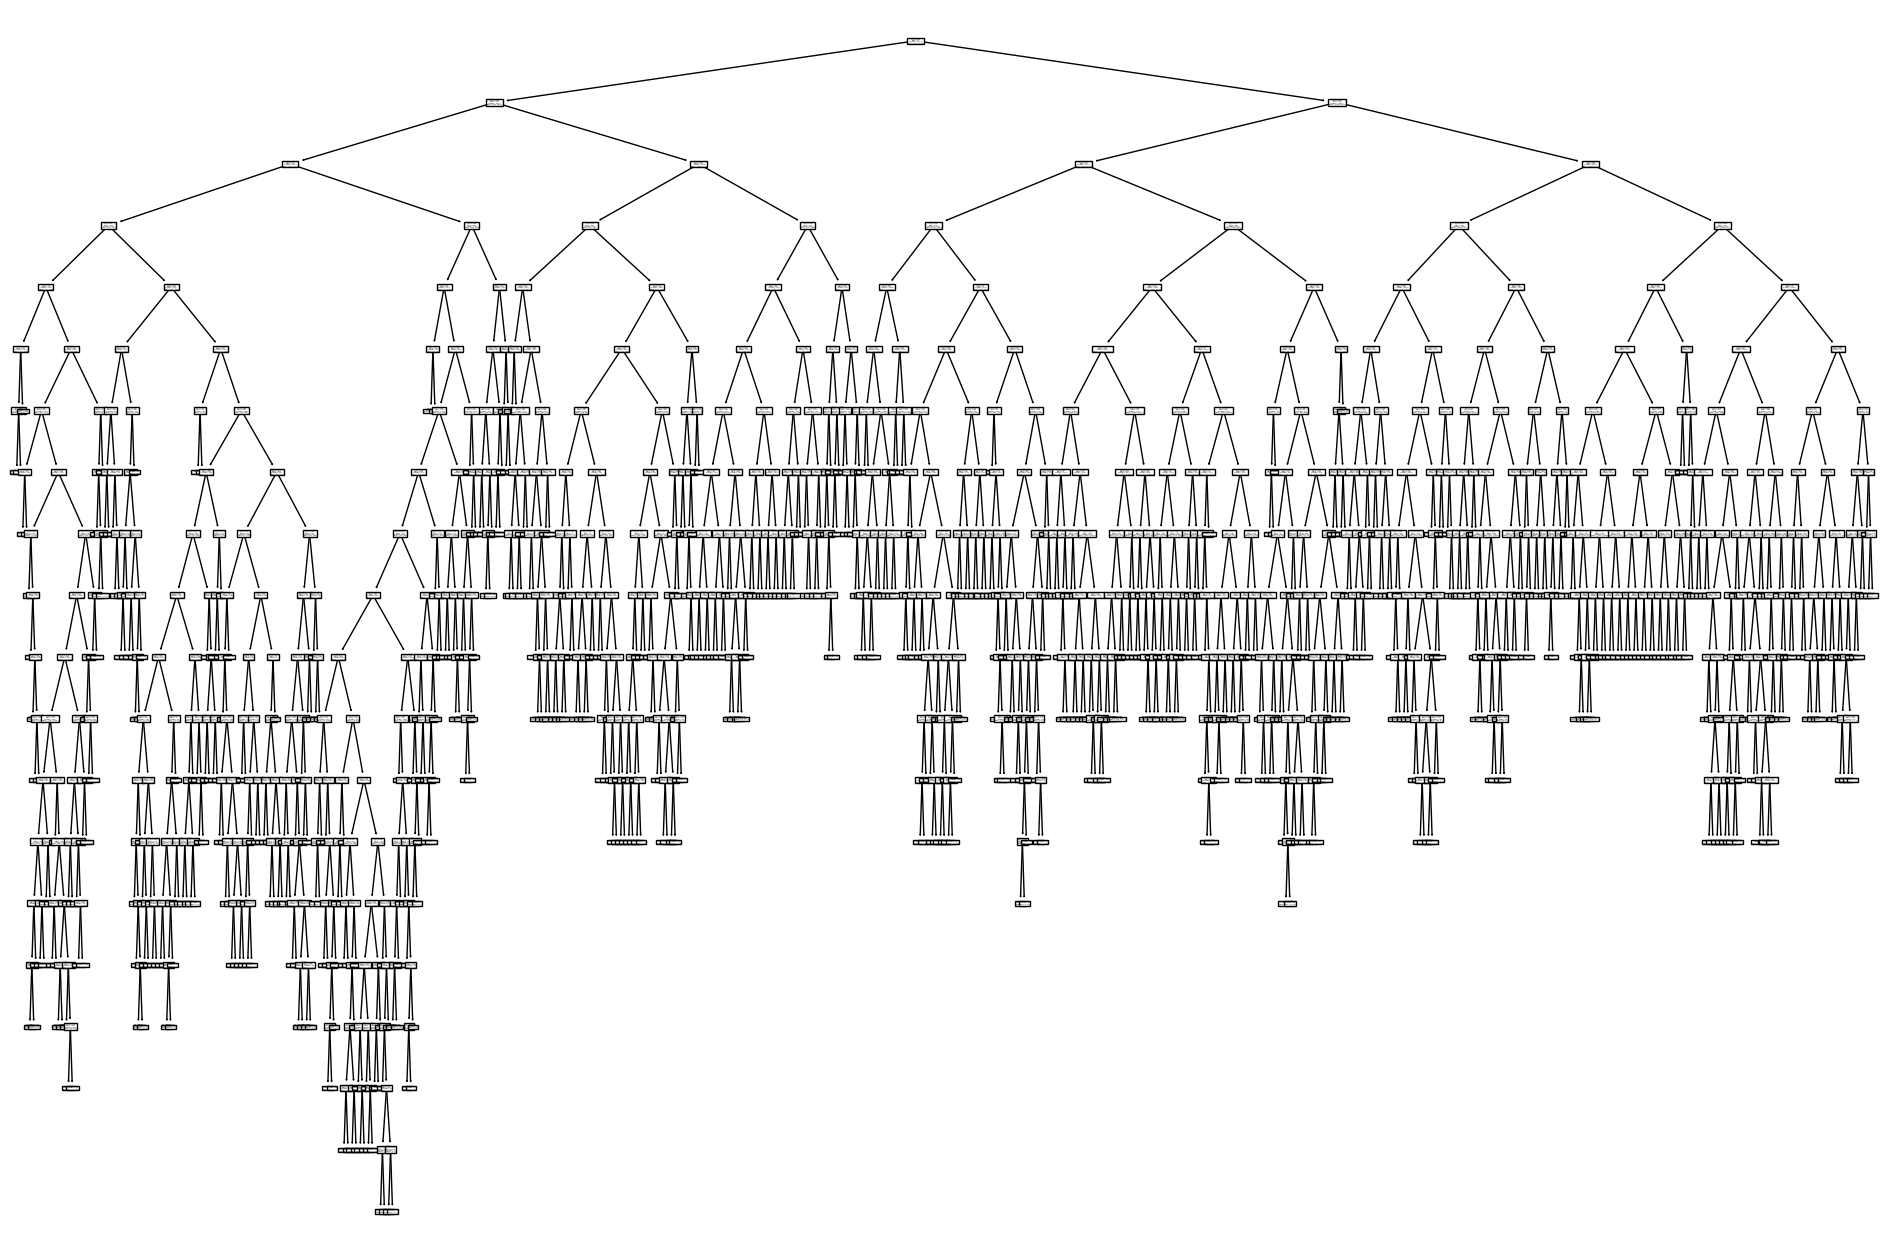

In [17]:
plt.figure(figsize=(24,16))
tree.plot_tree(clf)
plt.show()

A confusion matrix can be used to simplify this data. A confusion matrix shows the split between true positives, true negatives, false positives, and false negatives. The decision trees predictions will be compared to the true data. We want our predictions and the true values to agree as much as possible and for our predictions and the false values to disagree as much as possible. We can do this using the metrics of precision, recall, and f1-score. These calculations are done as follows:



TP = true positive

FP = false positive

FN = false negative








Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1-Score = (2 * precision * recall) / (precision + recall)

In [18]:
def evaluateModel(clf, X, y):

    # confusion matrix
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dead', 'alive'])
    cm_disp.plot()

    # print metrics
    print("Precision = " + str(np.round(precision_score(y, y_pred),3)))
    print("Recall = " + str(np.round(recall_score(y, y_pred),3)))
    print("F1 = " + str(np.round(f1_score(y, y_pred),3)))

Training model is tuned using hyperparameters. The max depth prevents the decision tree from having too many branches.

In [19]:
# train model
clf_tuned = tree.DecisionTreeClassifier(random_state=0, max_depth=3) # set max depth to 3
clf_tuned = clf_tuned.fit(X_train, y_train)

We can display how much more readable this decision tree is, and it starts to show some human readable predictors that will be used in the model.

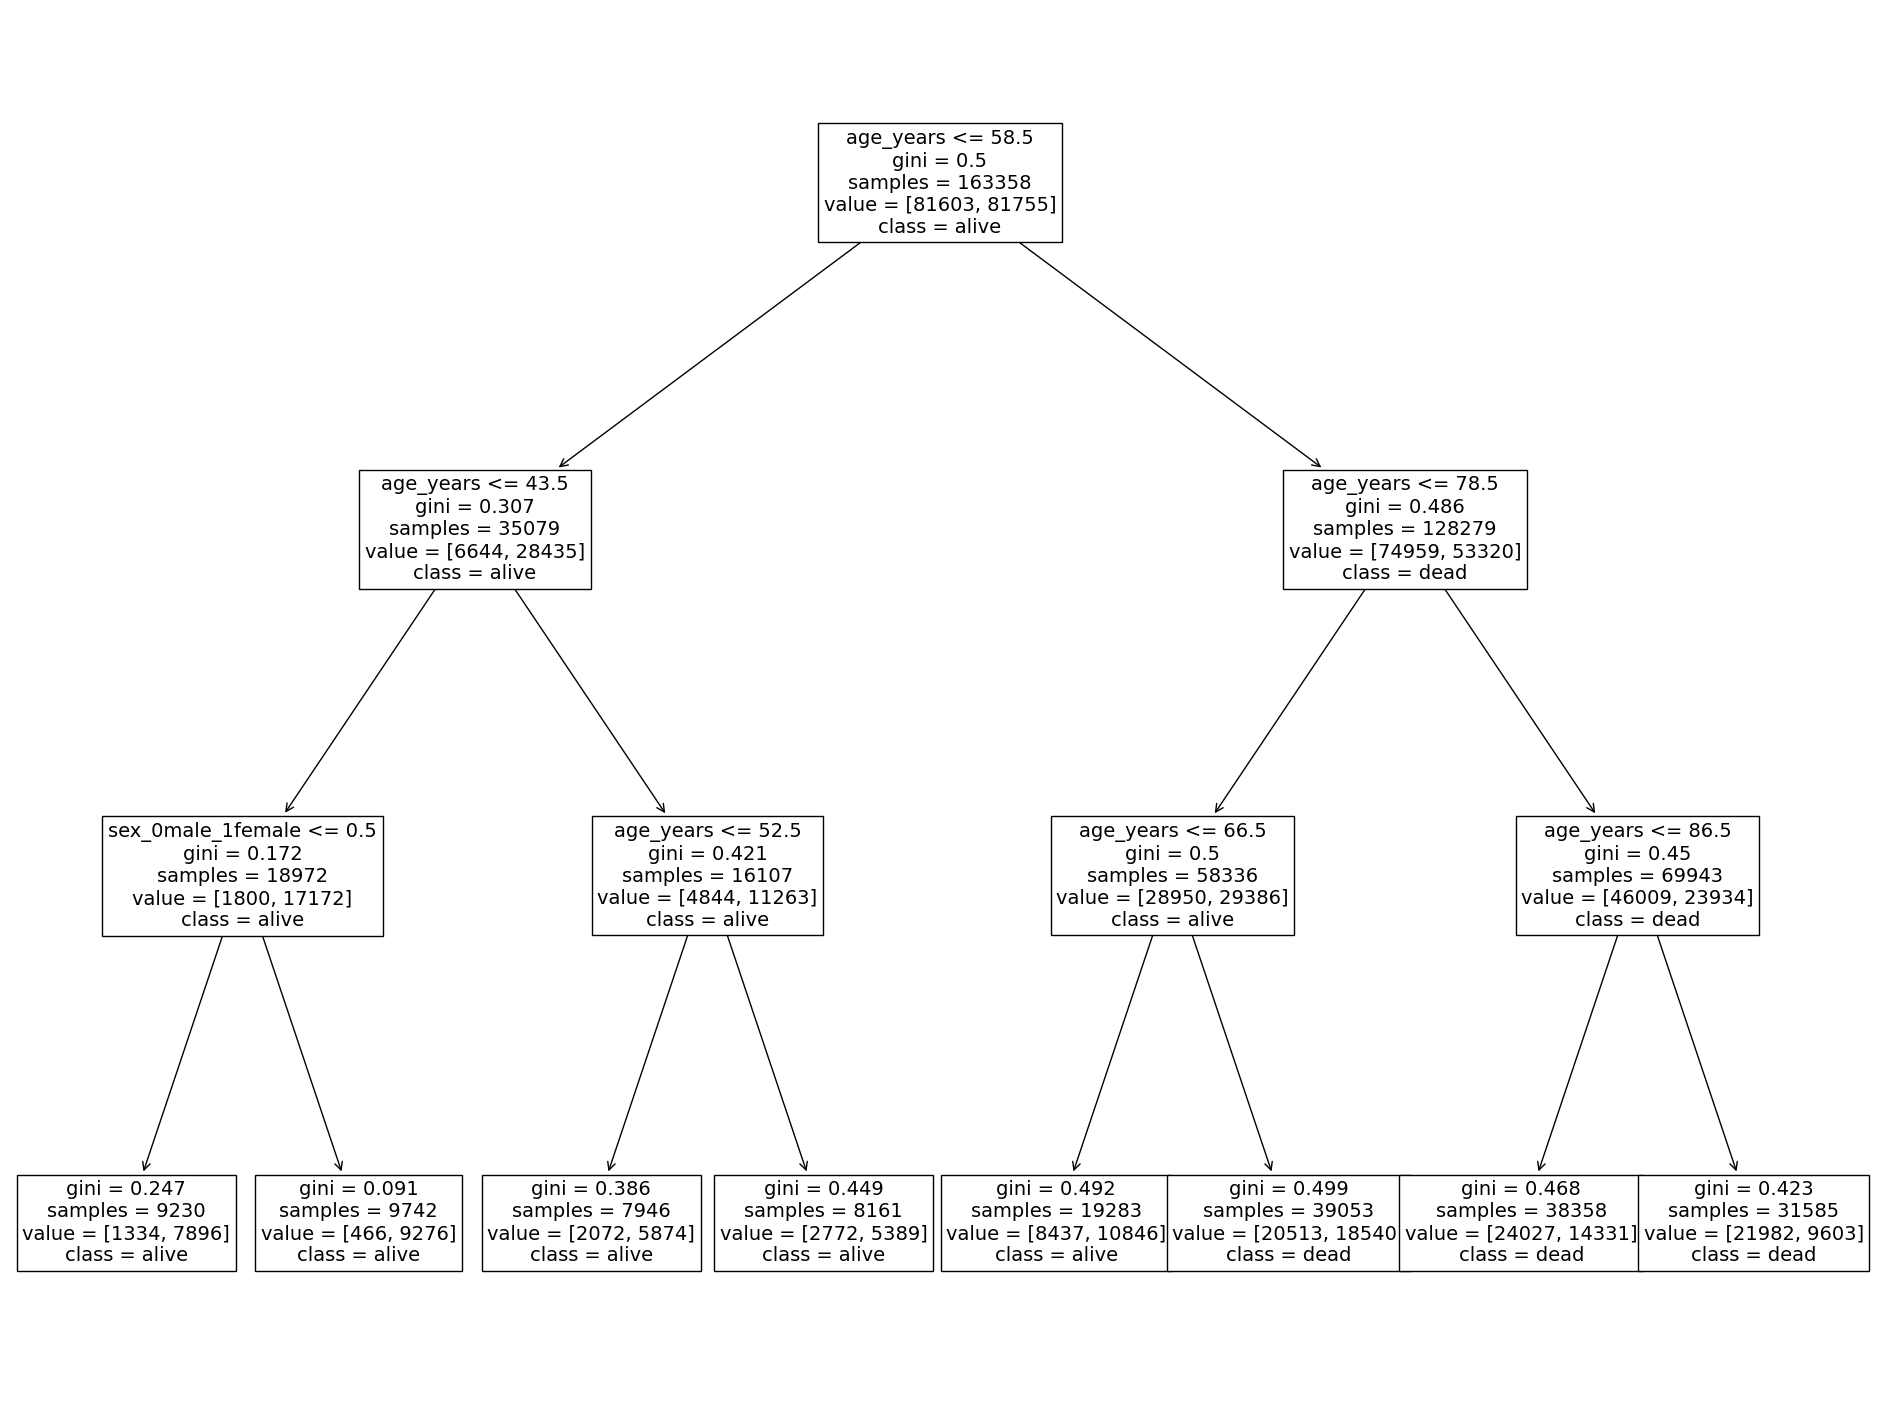

In [22]:
plt.figure(figsize=(24,18))

tree.plot_tree(clf_tuned,feature_names=X_var_names, class_names=['dead', 'alive'], fontsize=14)
plt.show()

Using the training and testing model, we can see how the Gini Impurity model does in predicting outcomes. The first is the training set graphed visually, and the second is the testing data that the model is actually predicting. We can see that the precision of the model is the same for the training and the testing data.

Precision = 0.723
Recall = 0.48
F1 = 0.577


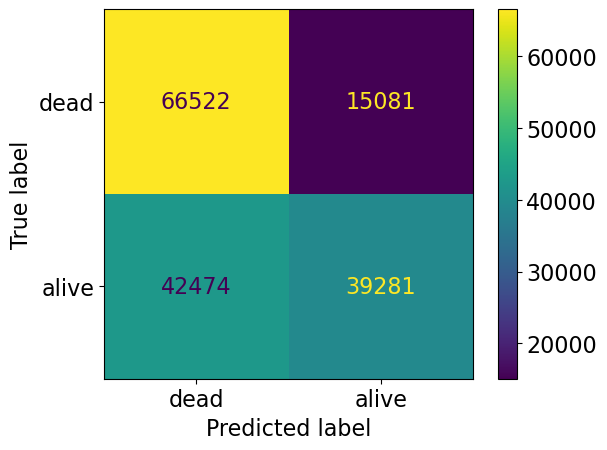

In [23]:
evaluateModel(clf_tuned, X_train, y_train)

Precision = 0.723
Recall = 0.482
F1 = 0.579


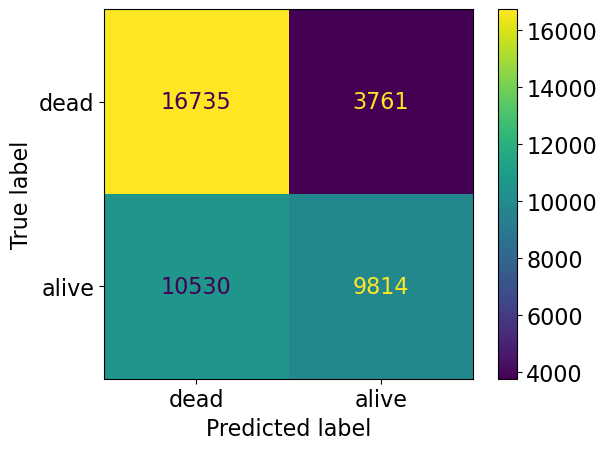

In [24]:
evaluateModel(clf_tuned, X_test, y_test)